<a href="https://colab.research.google.com/github/juanxo90/geostats_curie/blob/main/notebooks/notebook1_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic exploratory data analysis. 

During this steep we will do the exploratory data analisys for the Depth to the bottom of magnetic source, followin the same steeps mentioned in the paper.

## Install and import used libraries

In [40]:
%%capture
!pip install geopandas rtree pygeos

In [74]:
import geopandas as gpd
import pandas as pd
import folium
from folium import Circle, Marker, CircleMarker
from folium.plugins import HeatMap
import branca
import branca.colormap as cm

## Creating dataframes for visualization

It is important to say that only the Zb (depth to the bottom of magnetic source) will be analized

In [47]:
data_url = 'https://raw.githubusercontent.com/juanxo90/geostats_curie/main/data/data.dat'
data = pd.read_csv(data_url,
            skiprows = 12, header=None, sep='\t',
            names=['x', 'y', 'FP', 'Zt', 'Zo',
                     'Zb', 'Zt_err', 'Zo_err', 
                     'Zb_err', 'misfit'])

In [48]:
# creating a geopandas dataframe
gdf = gpd.GeoDataFrame(data[['x', 'y', 'Zb']],
                             geometry=gpd.points_from_xy(
                                 data.x,
                                 data.y
                             ),
                       crs='EPSG:4326')

In [50]:
# getting the mexico boundaries
url_edos = 'https://data.opendatasoft.com/explore/dataset/georef-mexico-state-millesime@public/download/?format=geojson&timezone=America/Mexico_City&lang=en'
states = gpd.read_file(url_edos)
states = states[states.year == '2019']

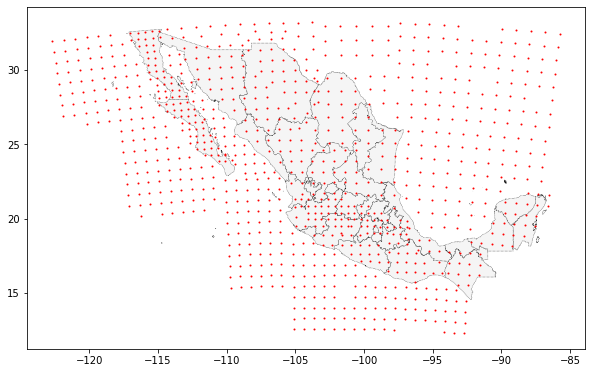

In [51]:
# and making a visualization
ax = states.plot(figsize=(10,10),
                  color='whitesmoke',
                  linestyle=':',
                  edgecolor='black',
                  linewidth=0.5)
gdf.plot(markersize=1, color='#FF0000', ax=ax)

As we can see, these is the distribution of the centroids where de depth to the bottom of magnetic sources (DBMS) was calculated.

From these data, before to make the data exploration, we can generate the interactive map to see the distribution and values for every DBMS.

In [54]:
# getting the centroids

x_center = gdf.centroid.x.mean()
y_center = gdf.centroid.y.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


In the paper, to making the maps the authors used this color ramp:

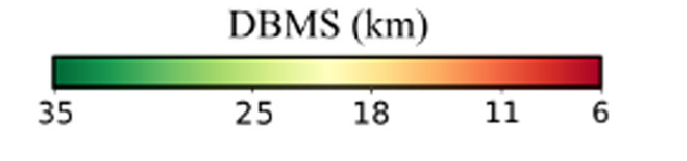

For this visualizaiton we will take only a general ramp of color

In [58]:
# creating a folium map
m = folium.Map(location=[y_center, x_center], 
                 tiles='cartodbpositron', 
                 zoom_start=4.5)

colormap = cm.LinearColormap(colors=['red', 'yellow','green'],
                             index=[6, 18, 35], 
                             vmin=gdf.Zb.min(),vmax=gdf.Zb.max())
colormap

m